# Capstone 2 - Diabetes Patients’ Readmission Prediction

## Modeling 

#### Code written by: Rayees Ahamed 

**Steps:**
1. Importing necessary packages
2. Loading and verifying the scaled data
3. Training & test split
4. Model 1: Logistic Regression
5. Model 2: k-Nearest Neighbors (kNN)
6. Model 3: Gradient Boosting Classifier
7. Hyperparameter tuning
8. Final model selection
9. Summary & deployment

## Imports

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rayees-codes/Capstone-2---Rayees---Diabetes-Readmission-Prediction/main/data/Diabetes_SOLVED_NEW.csv')
df.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,...,service_utilization_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age_mean|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,Caucasian,0,3,59,0,18,9,-99,-99,0,...,0.000000,54,0,177,1062,162,135.0,18,27,18
1,AfricanAmerican,0,2,11,5,13,6,-99,-99,0,...,1.386294,26,65,22,143,78,150.0,0,12,0
2,Caucasian,1,2,44,1,16,7,-99,-99,0,...,0.000000,32,16,88,704,112,245.0,16,14,16
3,Caucasian,1,1,51,0,8,5,-99,-99,0,...,0.000000,8,0,51,408,40,225.0,8,5,0
4,Caucasian,1,3,31,6,16,9,-99,-99,0,...,0.000000,48,96,93,496,144,495.0,0,27,0


In [ ]:
df.columns

Index(['race', 'gender', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'numchange', 'age_mean', 'nummed', 'number_inpatient_log1p',
       'number_emergency_log1p', 'number_outpatient_log1p',
       'service_utilization_log1p', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age_mean|number_diagnoses',
       'change|num_medications

## Preprocessing steps

In [ ]:
# X variable assignment 
X = df.drop('readmitted', axis=1)

In [ ]:
# Getting dummies
X = pd.get_dummies(X)

In [ ]:
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
time_in_hospital,3.0,2.000000,2.0,1.0,3.0,4.0,5.0,13.0,12.0,9.0
num_lab_procedures,59.0,11.000000,44.0,51.0,31.0,70.0,73.0,68.0,33.0,47.0
num_procedures,0.0,5.000000,1.0,0.0,6.0,1.0,0.0,2.0,3.0,2.0
num_medications,18.0,13.000000,16.0,8.0,16.0,21.0,12.0,28.0,18.0,17.0
number_diagnoses,9.0,6.000000,7.0,5.0,9.0,7.0,8.0,8.0,8.0,9.0
max_glu_serum,-99.0,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
A1Cresult,-99.0,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
metformin,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
repaglinide,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Target variable class size
df['readmitted'].value_counts()

0    64163
1     6250
Name: readmitted, dtype: int64

In [ ]:
# y variable assignment 
y = df['readmitted']

## Train/Test split

In [ ]:
# Train & test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110, stratify=y)

In [ ]:
# Verifying X shape
X_train.shape, X_test.shape

((52809, 51), (17604, 51))

In [ ]:
# Verifying y shape
y_train.shape, y_test.shape

((52809,), (17604,))

In [ ]:
# Checking datatype to be numeric in all
X_train.dtypes != 'object'

gender                                 True
time_in_hospital                       True
num_lab_procedures                     True
num_procedures                         True
num_medications                        True
number_diagnoses                       True
max_glu_serum                          True
A1Cresult                              True
metformin                              True
repaglinide                            True
nateglinide                            True
chlorpropamide                         True
glimepiride                            True
acetohexamide                          True
glipizide                              True
glyburide                              True
tolbutamide                            True
pioglitazone                           True
rosiglitazone                          True
acarbose                               True
miglitol                               True
troglitazone                           True
tolazamide                      

## Scaling the data

In [ ]:
# Making a scaler object
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Verifying the scaling

In [ ]:
# Verifying the mean of scaled_df (mean =0)
X_train_scaled.mean()

7.281505234728174e-18

In [ ]:
# Verifying the standard deviation (std = 1)
X_test_scaled.std(ddof=0)

0.992539162888569

## Model 1: Logistic regression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred1 = lg_model.predict(X_test_scaled)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1))
print('Recall: ', recall_score(y_test, y_pred1))

Accuracy:  0.9112133605998637
Precision:  0.0
Recall:  0.0


**Results**


*   Model accuracy is good, but precision & recall scores are bad
*   This is sign of **class imbalance** problem
*   We can use SMOTE technique to solve the class imbalance



In [ ]:
df['readmitted'].value_counts()

0    64163
1     6250
Name: readmitted, dtype: int64

Above clearly we can see the imbalance in the classes


##SMOTE for balancing data

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 48122, 1: 4687})
New dataset shape Counter({0: 48122, 1: 48122})


### Creating new dataframe after SMOTE




In [60]:
train_input_new = pd.DataFrame(train_input_new, columns=list(X.columns))

### Train/Test split from new dataframe

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.25, random_state=110)

### Training again with Model 1: Logistic Regression

In [64]:
lg_model_2 = LogisticRegression()
lg_model_2.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred2 = lg_model_2.predict(X_test)

In [68]:
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2))
print('Recall: ', recall_score(y_test, y_pred2))

Accuracy:  0.6692988653838161
Precision:  0.6667481662591687
Recall:  0.6789775085069301


**Conclusion:** 

**Model 1 - Logistic regression**


*   Initial model testing showed high accuracy (>90%)
*   But precison and recall scores were bad (0%)
*   We found class imbalance problem, used SMOTE technique to balance the classes
*   After SMOTE, precision and recall scores improved to 66%, but accuracy dropped from 90% to 67%



## Model 2: KNearest Neighbors Classifier

In [69]:
# Initial model (k=3)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
print('Train score:', knn.score(X_train, y_train))
print('Test score:', knn.score(X_test, y_test))

Train score: 0.9185403765429533
Test score: 0.8450189102697311


In [70]:
y_pred_knn = knn.predict(X_test)

In [72]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Accuracy:  0.8450189102697311
Precision:  0.7710450873077925
Recall:  0.9821561955348992



*   With kNN model (n_neighbors=3), accuracy, precision  and recall scores were better than logistic regression model 
*   We can still optimize the n_neighbors parameter to improve results



### Finding the right 'k' neighbors values

In [74]:
# Testing n_neighbors 1 to 10
test_scores = []
train_scores = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [76]:
# Printing the scores according to k
knn_scores = pd.DataFrame({'train_scores':train_scores, 'test_scores':test_scores})
knn_scores['k'] = list(range(1,10))
knn_scores.set_index('k', inplace=True)
print(knn_scores)

   train_scores  test_scores
k                           
1      0.999945     0.883463
2      0.987920     0.888118
3      0.918540     0.845019
4      0.927351     0.856864
5      0.876855     0.819500
6      0.888741     0.831096
7      0.848288     0.798678
8      0.860507     0.809941
9      0.826455     0.781638


### Plotting the train and test scores by n_neighbors

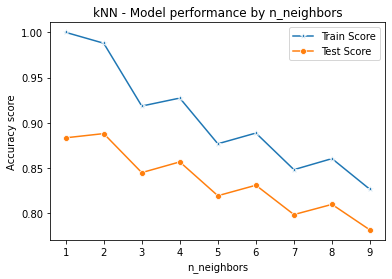

In [81]:
plt.figure()
sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy score')
plt.title('kNN - Model performance by n_neighbors')
plt.show()

**Results:**

From the above plot,

*   When number of neighbors increases accuracy score decreases in both train and test sets
*   **n_neighbors=2** gave highest train and test accuracy score, but it will be highly underfitting our model
*   So, **n_neighbors = 4** might be right parameter as it has good bias/variance trade-off with **train accuracy: 92%, test accuracy: 85%**



In [87]:
# neighbors = 4 kNN model training
knn4 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn4.fit(X_train, y_train)
y_pred_knn4 = knn4.predict(X_test)

In [99]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn4))
print('Precision: ', precision_score(y_test, y_pred_knn4))
print('Recall: ', recall_score(y_test, y_pred_knn4))

Accuracy:  0.8568638044969037
Precision:  0.7962542174481856
Recall:  0.9597476969043074


In [88]:
# Classification report - kNN
cr_knn = classification_report(y_test, y_pred_knn4)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     12012
           1       0.80      0.96      0.87     12049

    accuracy                           0.86     24061
   macro avg       0.87      0.86      0.86     24061
weighted avg       0.87      0.86      0.86     24061



In [98]:
# Confusion matrix
knn_matrix = confusion_matrix(y_test, y_pred_knn4)
knn_df = pd.DataFrame(knn_matrix)
knn_df['Confusion matrix'] = ['Predicted = Yes', 'Predicted = No']
knn_df.set_index('Confusion matrix', inplace=True)
knn_df.rename(columns={0:'Actual = Yes', 1:'Actual = No'}, inplace=True)
knn_df

,Actual = Yes,Actual = No
Confusion matrix,,
Predicted = Yes,9053,2959
Predicted = No,485,11564


**Conclusion:**

**Model 2: k-Nearest Neighbors**

Initial model with **n_neighbors=3** gave decent preformance metrics, After optimizing the right number of neighbors, we chose **n_neighbors=4**.

**Score comparison:**
*   n_neighbors=3 gave, (Accuracy/Precision/Recall: **0.84/0.77/0.98**)
*   n_neighbors=4 gave, (Accuracy/Precision/Recall: **0.85/0.79/0.96**)

Very small improvement in scores were seen between neighbors 3 and 4.

## Model 3: Gradient Boosting Classifier

In [75]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=110)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=110)

In [85]:
print('Accuracy score (training): ', gb_model.score(X_train, y_train))
print('Accuracy score (test): ', gb_model.score(X_test,y_test))

Accuracy score (training):  0.9133591011734065
Accuracy score (test):  0.9128465151074353




*   Best training and test scores compared to previous two models
*   Multiple learning rates can be checked


**Testing multiple learning rates**

In [103]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=3, random_state=110)
    gb_model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print('Accuracy score (training): ', gb_model.score(X_train, y_train))
    print('Accuracy score (test): ', gb_model.score(X_test,y_test))

Learning rate:  0.05
Accuracy score (training):  0.8888657994264577
Accuracy score (test):  0.888159261876065
Learning rate:  0.1
Accuracy score (training):  0.9133591011734065
Accuracy score (test):  0.9128465151074353
Learning rate:  0.25
Accuracy score (training):  0.9284319022484518
Accuracy score (test):  0.926686338888658
Learning rate:  0.5
Accuracy score (training):  0.9380740617596941
Accuracy score (test):  0.9366194256265326
Learning rate:  0.75
Accuracy score (training):  0.9421054819001704
Accuracy score (test):  0.9384065500187024
Learning rate:  1
Accuracy score (training):  0.9449177784242827
Accuracy score (test):  0.9402767964756245


------------------------------------------------------------

Best learning rate: 1, with train and test accuracy: 94%

------------------------------------------------------------

**Applying the best learning rate in Gradient Boost Model**

In [104]:
gb_final = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=110)
gb_final.fit(X_train, y_train)
y_pred_gb = gb_final.predict(X_test)

In [122]:
print('Accuracy: ', accuracy_score(y_test, y_pred_gb))
print('Precision: ', precision_score(y_test, y_pred_gb))
print('Recall: ', recall_score(y_test, y_pred_gb))

Accuracy:  0.9402767964756245
Precision:  0.9913872939433228
Recall:  0.8884554734832766


In [105]:
# classification report - Gradient Boosting Model
cm_gb = classification_report(y_test, y_pred_gb)
print(cm_gb)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12012
           1       0.99      0.89      0.94     12049

    accuracy                           0.94     24061
   macro avg       0.95      0.94      0.94     24061
weighted avg       0.95      0.94      0.94     24061



**ROC curve for the Gradient Boosting Model:**

In [117]:
import sklearn.metrics as metrics

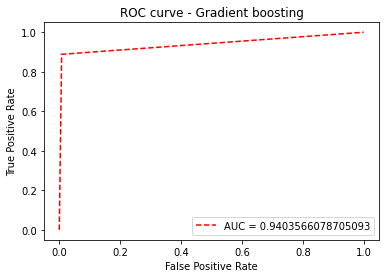

In [121]:
# Defining the metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_gb)
auc = metrics.roc_auc_score(y_test, y_pred_gb)

# Creating the ROC curve
plt.plot(fpr, tpr, linestyle='--', label='AUC = '+str(auc), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Gradient boosting')
plt.legend(loc=4)
plt.show()

**Results:**

**Model 3: Gradient Boosting Classifier**


*   Among all models, model 3 gave **highest training and test accuracy scores of 94%**
*   Mean **precision scores were >90%**
*   Mean **recall scores were >89%**

## Model comparison

In [123]:
# Logistic regression scores
accuracy_log_reg = accuracy_score(y_test, y_pred2)
precision_log_reg = precision_score(y_test, y_pred2)
recall_log_reg = recall_score(y_test, y_pred2)

# kNN scores
accuracy_knn = accuracy_score(y_test, y_pred_knn4)
precision_knn = precision_score(y_test, y_pred_knn4)
recall_knn = recall_score(y_test, y_pred_knn4)

# Gradient boosting scores
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

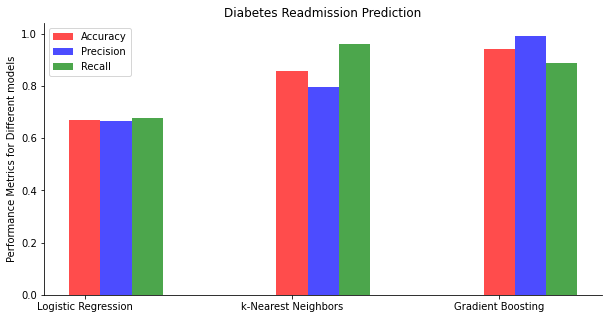

In [126]:
# Plotting the scores of all models

plt.figure(figsize=(10,5))
ax = plt.subplot(111)

# Accuracy
models = ['Logistic Regression', 'k-Nearest Neighbors', 'Gradient Boosting']
values = [accuracy_log_reg, accuracy_knn, accuracy_gb]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'Accuracy')
plt.xticks(model, models)
           

# Precision           
ax = plt.subplot(111)

models = ['Logistic Regression', 'k-Nearest Neighbors', 'Gradient Boosting']
values = [precision_log_reg, precision_knn, precision_gb]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'Precision')
plt.xticks(model, models)


# Recall
ax = plt.subplot(111)

models = ['Logistic Regression', 'k-Nearest Neighbors', 'Gradient Boosting']
values = [recall_log_reg, recall_knn, recall_gb]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'Recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Diabetes Readmission Prediction')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

## Model Selection:



*   kNN and gradient boosting models have similar scores
*   But gradient boosting has high precision score than kNN 
*   Also kNN model is computationally expensive 
*   So, we will select **Gradient Boosting Classifier** for our final model optimization



### Hyperparameter tuning

**RandomizedSearch CV**

We can tune gradient boosting parameters using RandomizedSearchCV function because computaionally less expensive, faster and saves runtime. Also, produces very close results to GridSearchCV function.

In [133]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees
n_estimators = range(100, 500, 100)

# maximum depth of trees
max_depth = range(1,5,1)

# learning rate
learning_rate = [1]     # already optimized

# random search grid
random_search_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

# model
gbc = GradientBoostingClassifier()

# scorer
from sklearn.metrics import make_scorer
auc_scoring = make_scorer(roc_auc_score)

# randomCV tuning
randomCV_gbc = RandomizedSearchCV(estimator = gbc, param_distributions = random_search_grid, cv=5, scoring=auc_scoring, random_state=110)

randomCV_gbc.fit(X_train, y_train)
randomCV_gbc.best_params_

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 400}

Best parameters by RandomSearchCV:
* learning_rate: 1 
* max_depth: 2 
* n_estimators: 400





## Final Model: Best Classifier

In [134]:
# Gradient Boosting Classifier
final_model = GradientBoostingClassifier(n_estimators=400, learning_rate=1, max_depth=2, random_state=110)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [135]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.9425210922239309
Precision:  0.9927924598041028
Recall:  0.8916922566188066


In [136]:
# classification report - Final GB Model
final_cm = classification_report(y_test, y_pred)
print(final_cm)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12012
           1       0.99      0.89      0.94     12049

    accuracy                           0.94     24061
   macro avg       0.95      0.94      0.94     24061
weighted avg       0.95      0.94      0.94     24061



**Comparison of baseline and optimized scores after hyperparameter tuning**

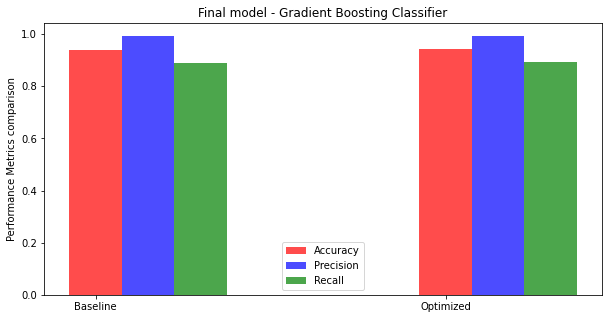

In [141]:
# Baseline scores
accuracy_base = accuracy_score(y_test, y_pred_gb)
precision_base = precision_score(y_test, y_pred_gb)
recall_base = recall_score(y_test, y_pred_gb)

# Optimized scores
accuracy_tuned = accuracy_score(y_test, y_pred)
precision_tuned = precision_score(y_test, y_pred)
recall_tuned = recall_score(y_test, y_pred)

# Plotting the scores 
plt.figure(figsize=(10,5))
axis = plt.subplot(111)

# Accuracy
models = ['Baseline', 'Optimized']
values = [accuracy_base, accuracy_tuned]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'Accuracy')
plt.xticks(model, models)
           

# Precision           
ax = plt.subplot(111)

models = ['Baseline', 'Optimized']
values = [precision_base, precision_tuned]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'Precision')
plt.xticks(model, models)


# Recall
ax = plt.subplot(111)

models = ['Baseline', 'Optimized']
values = [recall_base, recall_tuned]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'Recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics comparison')
plt.title('Final model - Gradient Boosting Classifier')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.legend()

plt.show()           

# Summary

* Gradient Boosting classifier has been idenfied as best classifier for this dataset.
* It gave accuracy = 94%, precision = 99%, recall = 89%